In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [4]:

iris = pd.read_csv("/content/Iris.csv")
print("Dataset Imported Successfully.")

Dataset Imported Successfully.


In [5]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
iris.shape

(150, 6)

In [7]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


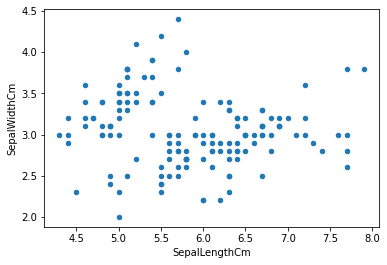

In [8]:
iris.plot(kind="scatter", x="SepalLengthCm",   y="SepalWidthCm")
plt.show()

In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
#We will take "Species" as the variable of our interest.
iris['Species'].unique()

iris['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [12]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

Text(0.5, 1.0, 'Elbow Method')

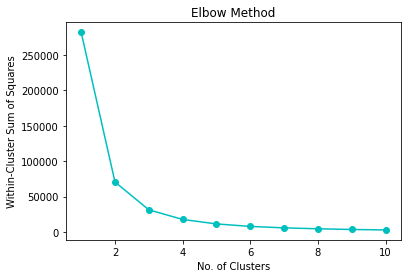

In [29]:
WCSS = []     

for i in range(1,11):
    cluster_model = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    cluster_model.fit(X)
    WCSS.append(cluster_model.inertia_)
    
plt.plot(range(1,11),WCSS,'ro-',color='c')
plt.xlabel("No. of Clusters")
plt.ylabel("Within-Cluster Sum of Squares")
plt.title("Elbow Method")

In [19]:
from sklearn.model_selection import train_test_split
x = iris.iloc[:, :-1].values #last column values excluded
y = iris.iloc[:,   -1].values #last column value
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)  #Splitting the dataset into the Training set and Test set

In [20]:
iris_data=load_iris()   #loading iris dataset from sklearn.datasets

In [21]:
iris_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names) #creating dataframe

In [22]:
kmeans = KMeans(n_clusters=3,init = 'k-means++',   max_iter = 100, n_init = 10, random_state = 0) #Applying Kmeans classifier

In [23]:
y_kmeans = kmeans.fit_predict(x)

In [24]:
print(kmeans.cluster_centers_) #display cluster centers

[[125.5     6.588   2.974   5.552   2.026]
 [ 25.5     5.006   3.418   1.464   0.244]
 [ 75.5     5.936   2.77    4.26    1.326]]


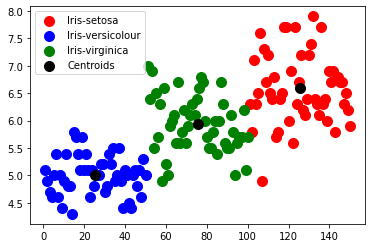

In [26]:
plt.scatter(x[y_kmeans   == 0, 0], x[y_kmeans == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans   == 1, 0], x[y_kmeans == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans   == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')   #Visualising the clusters - On the first two columns
plt.scatter(kmeans.cluster_centers_[:,   0], kmeans.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')   #plotting the centroids of the clusters
plt.legend()
plt.show()